## 🧠 Ejercicio Avanzado: Planificación de Rutas de Entrega

Una empresa de logística realiza entregas entre distintas ciudades del Ecuador. Las ciudades están conectadas por rutas con costos asociados que representan el **precio del combustible + peajes** en USD. El gerente desea conocer la **ruta más económica** para enviar mercancía desde **Ibarra** hasta **Loja**, pasando por al menos una ciudad costera.

### 📍 Ciudades:
- Ibarra
- Quito
- Santo Domingo
- Manta (costera)
- Portoviejo (costera)
- Guayaquil (costera)
- Cuenca
- Loja

### 🛣️ Conexiones y costos (USD):
- Ibarra → Quito: 10
- Quito → Santo Domingo: 15
- Quito → Manta: 30
- Santo Domingo → Manta: 12
- Manta → Portoviejo: 5
- Portoviejo → Guayaquil: 20
- Guayaquil → Cuenca: 25
- Cuenca → Loja: 18
- Quito → Cuenca: 35
- Santo Domingo → Guayaquil: 22
- Guayaquil → Loja: 40

---
### 🎯 Objetivos del estudiante
- Representar el grafo dirigido y ponderado.
- Visualizar el grafo con `networkx`.
- Usar `dijkstra_path` para determinar el **camino más económico desde Ibarra hasta Loja**, verificando que **pase por al menos una ciudad costera** (`Manta`, `Portoviejo`, o `Guayaquil`).
- Mostrar el recorrido y el costo total.

💡 *Sugerencia:* Puedes comprobar si una ciudad costera está incluida en el camino usando una intersección de conjuntos en Python.

## Rúbrica de Evaluación: Ejercicio de Logística con Grafos

| Criterio Evaluado                                                                 | Puntaje Máximo |
|----------------------------------------------------------------------------------|----------------|
| Creación correcta del grafo con nodos y aristas                              | 20 puntos      |
| Asignación correcta de pesos (costos) a todas las conexiones                 | 15 puntos      |
| Visualización clara y bien etiquetada del grafo usando `networkx` y `matplotlib` | 20 puntos      |
| Cálculo correcto del camino más barato con `dijkstra_path`                   | 15 puntos      |
| Verificación de que el camino pase por al menos una ciudad costera          | 10 puntos      |
| Interpretación correcta del resultado (camino y costo total)                 | 10 puntos      |
| Claridad del código, comentarios y estilo                                    | 10 puntos      |
| **Total**                                                                       | **100 puntos** |

**Nota:** Se valorará la creatividad, la correcta identificación de ciudades, el uso adecuado de funciones de `networkx` y la legibilidad del código.



#############################
#      Programacion IV      #
#       Esteban Ruiz        #
#      Cuarto Semestre      #
#         30/10/2025        #
#############################



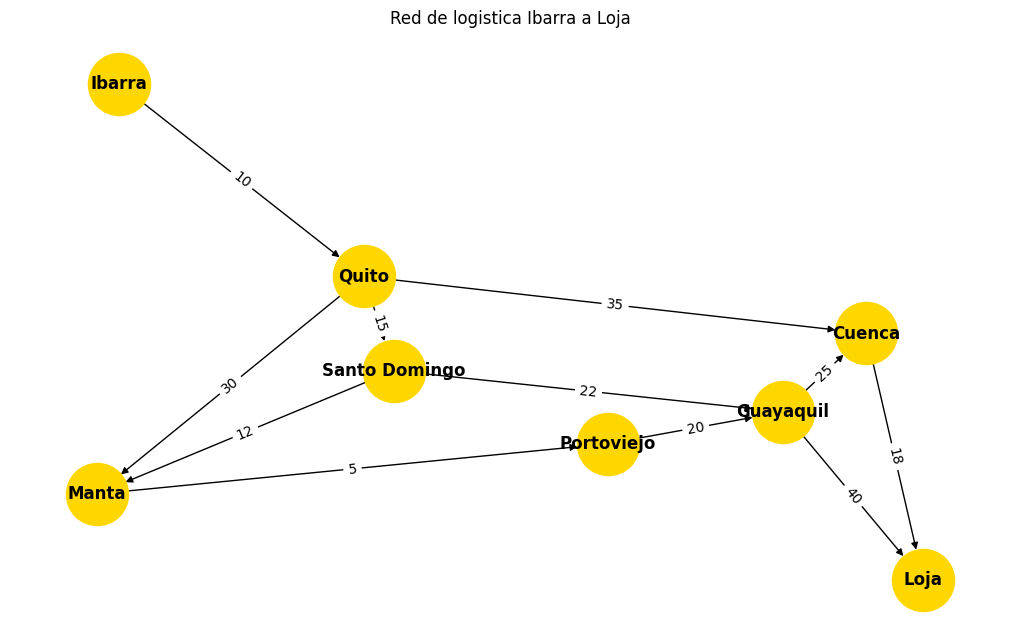

La ruta más corta NO pasa por ciudad costera.
Entonces se seguira la siguiente ruta: 
Ibarra -> Quito -> Santo Domingo -> Guayaquil -> Loja
Costo total: 87


In [12]:
print("""
#############################
#      Programacion IV      #
#       Esteban Ruiz        #
#      Cuarto Semestre      #
#         30/10/2025        #
#############################
""")


import networkx as nx
import matplotlib.pyplot as plt

#Definir las rutas y costos
rutas = [
    ("Ibarra", "Quito", 10),
    ("Quito", "Santo Domingo", 15),
    ("Quito", "Manta", 30),
    ("Santo Domingo", "Manta", 12),
    ("Manta", "Portoviejo", 5),
    ("Portoviejo", "Guayaquil", 20),
    ("Guayaquil", "Cuenca", 25),
    ("Cuenca", "Loja", 18),
    ("Quito", "Cuenca", 35),
    ("Santo Domingo", "Guayaquil", 22),
    ("Guayaquil", "Loja", 40)
]

#Creacion del grafo
G = nx.DiGraph()
G.add_weighted_edges_from(rutas)

#Dibujar el grafo
plt.figure(figsize=(10,6))
pos = nx.spring_layout(G, seed=38)
nx.draw(G, pos, with_labels=True, node_color='gold', node_size=2000, arrows=True, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Red de logistica Ibarra a Loja")
plt.show()

#Definir datos del problema
origen = "Ibarra"
destino = "Loja"
costeras = ["Manta", "Portoviejo", "Guayaquil"]

#Buscar la ruta más corta usando Dijkstra
camino = nx.dijkstra_path(G, origen, destino, weight="weight")
costo = nx.dijkstra_path_length(G, origen, destino, weight="weight")

#Verificar si pasa por ciudad costera
tiene_costera = any(ciudad in camino for ciudad in costeras)

#Mostrar resultado obtenido
if tiene_costera:
    print("Ruta más corta SI pasa por una ciudad costera:")
    print(" -> ".join(camino))
    print(f"Costo total: {costo}")
else:
    print("La ruta más corta NO pasa por ciudad costera.")
    print("Entonces se seguira la siguiente ruta: ")

    mejor_ruta = None
    mejor_costo = float('inf')

    #Intentar pasar por cada ciudad costera y sumar los costos
    for costera in costeras:
        try:
            camino1 = nx.dijkstra_path(G, origen, costera, weight="weight")
            camino2 = nx.dijkstra_path(G, costera, destino, weight="weight")
            ruta = camino1 + camino2[1:]
            costo_total = nx.dijkstra_path_length(G, origen, costera, weight="weight") + nx.dijkstra_path_length(G, costera, destino, weight="weight")

            if costo_total < mejor_costo:
                mejor_costo = costo_total
                mejor_ruta = ruta
        except nx.NetworkXNoPath:
            pass

    if mejor_ruta:
        print(" -> ".join(mejor_ruta))
        print(f"Costo total: {mejor_costo}")
    else:
        print("No existe ruta válida que pase por ciudad costera.")
